<a href="https://colab.research.google.com/github/ubsuny/PHY386/blob/Homework2025/2025/HW/EODAngelo/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extend the existing code:

In [35]:
# import libraries
import numpy as np
import scipy.linalg as la

In [36]:
def setup_mass_matrix(m_list):
    """
    This function creates the mass matrix using the inputted masses as the diagonal terms of the matrix. It can be used for any number of masses.

    Args:
    m_list -- list of masses

    returns:
    M -- mass matrix
    """
    M = np.diag(m_list)
    return M

In [86]:
M = setup_mass_matrix([1,1,1])
M

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [81]:
def setup_stiffness_matrix(k_list, walls=True):

    """
    This function creates the stiffness matrix using the provided spring constants list as the diagonal terms. It can be used for systems with or without walls.
    If the system has walls, there will be one more spring constant than masses.
    If the system has no walls, there will be one less spring constant than masses.

    Args:
    k_list -- list of spring constants
    walls -- indicates if the system has walls

    returns:
    K -- stiffness matrix
    """


    if walls:
      K = np.zeros(((len(k_list)-1),(len(k_list)-1)))
      for i in range(len(k_list)-1):
          K[i,i] = k_list[i]+k_list[i+1]
          if i < len(k_list)-2:
            K[i,i+1] = -k_list[i+1]
            K[i+1,i] = -k_list[i+1]

    else:
      K = np.zeros(((len(k_list)+1),(len(k_list)+1)))
      for i in range(len(k_list)+1):
            if i > 0:
                K[i, i] += k_list[i-1]
                K[i, i-1] = -k_list[i-1]
            if i < (len(k_list)):
                K[i, i] += k_list[i]
                K[i, i+1] = -k_list[i]


    return K

In [87]:
K = setup_stiffness_matrix([10,10],walls=False)
K

array([[ 10., -10.,   0.],
       [-10.,  20., -10.],
       [  0., -10.,  10.]])

In [88]:
def calculate_eigenfrequencies(K, M):
    """
    Function to solve the spring mass system for a given stiffness matrix K and mass matrix M.

    Args:
    K -- stiffness matrix
    M -- mass matrix

    returns:
    omega -- real eigenfrequencies of the system
    """
    eigenvalues, eigenvectors = la.eigh(K, M)
    omega = np.sqrt(eigenvalues)
    return omega


In [89]:
calculate_eigenfrequencies(K,M)

array([3.32486783e-08, 3.16227766e+00, 5.47722558e+00])

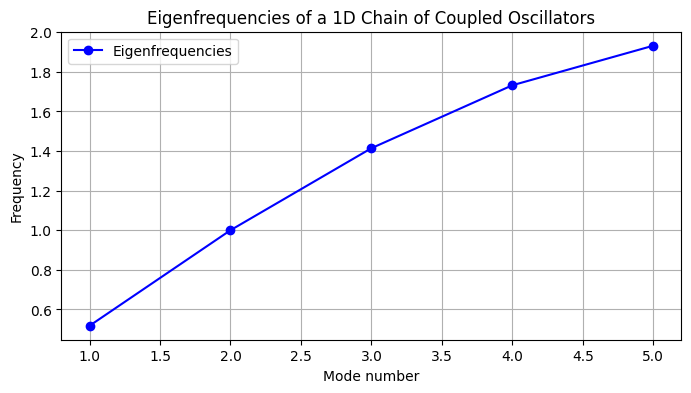

Eigenfrequencies: [0.51763809 1.         1.41421356 1.73205081 1.93185165]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of masses in a simple 1D chain
N = 5

# Mass and spring constants
m = 1.0  # Mass of each oscillator
k = 1.0  # Spring constant for nearest neighbor coupling

# Construct the tridiagonal dynamical matrix efficiently
off_diag = -k / m * np.ones(N-1)  # Off-diagonal elements
diag = (2 * k / m) * np.ones(N)   # Main diagonal elements

D = np.diag(diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(D)
eigenfrequencies = np.sqrt(np.abs(eigenvalues))  # Take positive square root

# Plot the eigenfrequencies
plt.figure(figsize=(8, 4))
plt.plot(range(1, N+1), eigenfrequencies, 'bo-', label='Eigenfrequencies')
plt.xlabel('Mode number')
plt.ylabel('Frequency')
plt.title('Eigenfrequencies of a 1D Chain of Coupled Oscillators')
plt.legend()
plt.grid()
plt.show()

# Print results
print("Eigenfrequencies:", eigenfrequencies)

# AI Creativity:

I utilized ChatGPT for this prompt. I consisdered branching out to a different AI, but I honestly use ChatGPT most often and figured it was most prudent to become even more familiar with it.

It took 4 iterations to arrive at the code I have posted. Originally it wanted to couple each mass not only to the one next to it, but to the next one over as well. I explained that this was not very realistic, as the adjacent mass and spring would be obstructing the link to the "next nearest mass".

Next it wanted to include some diagonal linking between masses. I thought this was a cool idea, but I am not familiar enough with the physics behind this arrangment to confidently say it was realistic.

So I then asked it to simplify things and it then produced code very similar to what I have for part one, which wasn't ideal. So finally I asked the AI to come up with a more creative way of writing the code and it did so using matrix operations. While this isnt the most impressive, it is something I can confidently say is realistic and is different than part 1.
The model the AI produced can be found in mayn places in nature but my personal favorite is vibrations in the crystalline lattice stuctures of solids, known as phonons.